In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/CoreyMSchafer/code_snippets/master/Python/Pandas/10-Datetime-Timeseries/ETH_1h.csv')

In [3]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


##### 

In [4]:
df.loc[0,'Date'].day_name()             # error becoz currently it's in string format

AttributeError: 'str' object has no attribute 'day_name'

In [5]:
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d %I-%p')          # formatting differs in different cases

In [6]:
df['Date'].head(2)

0   2020-03-13 20:00:00
1   2020-03-13 19:00:00
Name: Date, dtype: datetime64[ns]

In [7]:
df.loc[0,'Date'].day_name()

'Friday'

##### 

### We can also define date during df loading...

In [8]:
d_parser = lambda x: pd.datetime.strptime(x,'%Y-%m-%d %I-%p' )

df = pd.read_csv(r'https://raw.githubusercontent.com/CoreyMSchafer/code_snippets/master/Python/Pandas/10-Datetime-Timeseries/ETH_1h.csv',
                parse_dates=['Date'], date_parser=d_parser)

C:\Users\Himz\AppData\Local\Temp\ipykernel_3076\2246000826.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d_parser = lambda x: pd.datetime.strptime(x,'%Y-%m-%d %I-%p' )


In [9]:
df.head(2)

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09


##### 

In [10]:
df['Date'].dt.day_name()

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [11]:
df['DayOfWeek'] = df['Date'].dt.day_name()             # Assigning a new column of days

df.head(2)

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday


##### To see earlist date

In [12]:
df['Date'].min()

Timestamp('2017-07-01 11:00:00')

##### To see most recent date

In [13]:
df['Date'].max()

Timestamp('2020-03-13 20:00:00')

##### To get the amont of time between these two dates

In [14]:
df['Date'].max() - df['Date'].min()

Timedelta('986 days 09:00:00')

##### 

### Filtering Time

In [15]:
filt = (df['Date'] >= '2019') & (df['Date'] < '2020')
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


In [16]:
filt = (df['Date'] >= pd.to_datetime('2019-01-01')) & (df['Date'] < pd.to_datetime('2020-01-01'))
df.loc[filt]  

# Gives same result

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


### 

#### If you wanna use Dates as index, since they are unique in this table...

In [17]:
df.set_index('Date', inplace=True)

In [18]:
df.head(2)

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday


In [19]:
df.loc['2019'].head(3)

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday


##### 

##### Let say you wanna see dates from Jan to Feb of 2020

In [20]:
df['2020-01': '2020-02']

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-02-29 23:00:00,ETHUSD,223.35,223.58,216.83,217.31,1927939.88,Saturday
2020-02-29 22:00:00,ETHUSD,223.48,223.59,222.14,223.35,535998.57,Saturday
2020-02-29 21:00:00,ETHUSD,224.63,225.14,222.74,223.48,561158.03,Saturday
2020-02-29 20:00:00,ETHUSD,225.31,225.33,223.50,224.63,511648.65,Saturday
2020-02-29 19:00:00,ETHUSD,225.09,225.85,223.87,225.31,1250856.20,Saturday
...,...,...,...,...,...,...,...
2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday


##### 

#### Getting avg close price of ETH

In [21]:
df['2020-01': '2020-02']['Close'].mean()

195.16559027777814

##### 

### Let say you wanna see data on daily basis... 

In [22]:
df['2020-01': '2020-02'].head(24)                   # Showing 1 day data

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-02-29 23:00:00,ETHUSD,223.35,223.58,216.83,217.31,1927939.88,Saturday
2020-02-29 22:00:00,ETHUSD,223.48,223.59,222.14,223.35,535998.57,Saturday
2020-02-29 21:00:00,ETHUSD,224.63,225.14,222.74,223.48,561158.03,Saturday
2020-02-29 20:00:00,ETHUSD,225.31,225.33,223.50,224.63,511648.65,Saturday
2020-02-29 19:00:00,ETHUSD,225.09,225.85,223.87,225.31,1250856.20,Saturday
2020-02-29 18:00:00,ETHUSD,225.53,226.17,224.50,225.09,496543.91,Saturday
2020-02-29 17:00:00,ETHUSD,222.68,225.53,222.24,225.53,611136.47,Saturday
2020-02-29 16:00:00,ETHUSD,224.17,225.93,222.36,222.68,694384.75,Saturday
2020-02-29 15:00:00,ETHUSD,223.35,225.88,221.80,224.17,550893.74,Saturday


In [23]:
df.loc['2020-01-01', 'High'].max()

132.68

##### We will use concept of RESAMPLING now...

In [24]:
df['High'].resample('D').max()            # These resampling codes like 'D' can be found on pandas site

# Now we have high values of each day

Date
2017-07-01    279.99
2017-07-02    293.73
2017-07-03    285.00
2017-07-04    282.83
2017-07-05    274.97
               ...  
2020-03-09    208.65
2020-03-10    206.28
2020-03-11    202.98
2020-03-12    195.64
2020-03-13    148.00
Freq: D, Name: High, Length: 987, dtype: float64

In [25]:
highs = df['High'].resample('D').max() 

highs['2020-01-01']

132.68

##### 

In [26]:
%matplotlib inline

<AxesSubplot:xlabel='Date'>

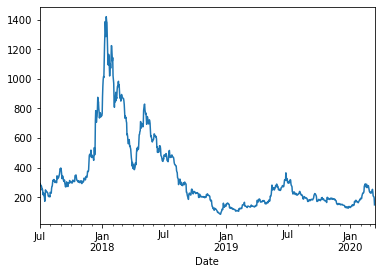

In [27]:
highs.plot()

##### 

### Resampling multiple columns

In [29]:
# In this df we need to use multiple aggregation methods as well..

df.resample('W').agg({'High': 'max' , 'Close': 'mean', 'Low': 'min', 'Volume':'sum'})

,High,Close,Low,Volume
Date,,,,
2017-07-02,293.73,268.202162,253.23,8.084631e+07
2017-07-09,285.00,261.062083,231.25,2.246746e+08
2017-07-16,240.33,195.698393,130.26,5.017750e+08
2017-07-23,249.40,212.783750,153.25,7.221637e+08
2017-07-30,229.99,203.309524,178.03,2.657305e+08
...,...,...,...,...
2020-02-16,290.00,255.198452,216.31,3.912867e+08
2020-02-23,287.13,265.321905,242.36,3.067838e+08
2020-03-01,278.13,236.373988,209.26,3.693920e+08


<AxesSubplot:xlabel='Date'>

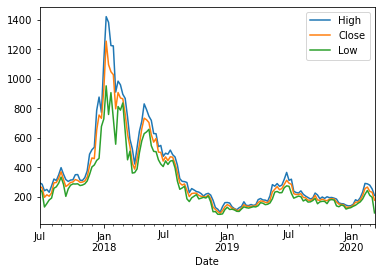

In [32]:
res = df.resample('W').agg({'High': 'max' , 'Close': 'mean', 'Low': 'min'})

res.plot()